In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import math
from random import randint

from sklearn.cluster import KMeans

This image is:  <class 'numpy.ndarray'> with dimensions:  (2338, 1700, 3)


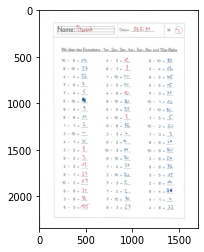

In [2]:
# Reading image
image = mpimg.imread('testImages/testImage2.jpg')

# Print image information and plot 
print('This image is: ', type(image), 'with dimensions: ', image.shape)
plt.imshow(image)

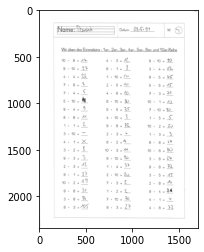

In [3]:
# Copy original image and apply grey scale
imageGrey = np.copy(image)
imageGrey = cv2.cvtColor(imageGrey, cv2.COLOR_RGB2GRAY)
plt.imshow(imageGrey, cmap='gray')

In [4]:
length = imageGrey.shape[0]
width = imageGrey.shape[1]

cropImg = imageGrey

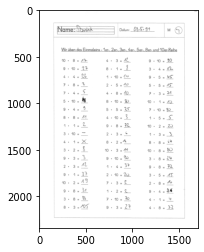

In [5]:
# Apply Gaussian Filtering
kernel_size = 5
gaussianFilteredImg = cv2.GaussianBlur(cropImg, (kernel_size, kernel_size), 0)
plt.imshow(gaussianFilteredImg, 'gray')

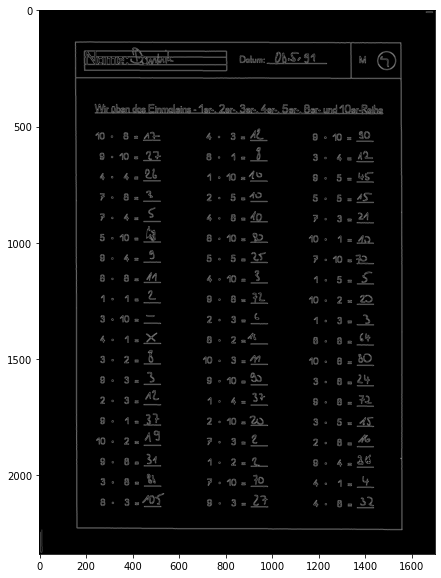

In [6]:
# Canny Image
low_threshold = 100
high_threshold = 200
cannyImg = cv2.Canny(gaussianFilteredImg, low_threshold, high_threshold)
plt.figure(figsize=(10,10))
plt.imshow(cannyImg, 'gray')

In [7]:
# Bring the above picuture into a clusterable format
pointList = []
for x in range(0, length): 
    for y in range(0, width):
        if cannyImg[x,y] > 0:
            pointList.append((x,y))
            
print("There are ", len(pointList), " equation points")
           
# Transform list into numpy Array
pointArray = np.array(pointList)     

There are  83875  equation points


In [8]:
k_means =  KMeans(init="k-means++", n_clusters=50, n_init=100)
k_means.fit(pointArray)

KMeans(n_clusters=50, n_init=100)

In [9]:
# Create random color map based on number of clusters

colorMapList = []
for i in range(0, k_means.n_clusters):
    randomColor = [randint(0,255), randint(0,255), randint(0,255)]
    randomColor[i%3] = 0
    colorMapList.append(randomColor)

colorMapList    

[[0, 86, 190],
 [52, 0, 226],
 [50, 96, 0],
 [0, 55, 191],
 [218, 0, 197],
 [143, 43, 0],
 [0, 50, 159],
 [3, 0, 13],
 [164, 209, 0],
 [0, 233, 14],
 [21, 0, 157],
 [120, 154, 0],
 [0, 117, 126],
 [156, 0, 158],
 [246, 187, 0],
 [0, 100, 234],
 [203, 0, 229],
 [8, 161, 0],
 [0, 82, 1],
 [124, 0, 87],
 [32, 148, 0],
 [0, 74, 207],
 [253, 0, 101],
 [15, 17, 0],
 [0, 51, 209],
 [220, 0, 94],
 [16, 69, 0],
 [0, 194, 112],
 [41, 0, 234],
 [197, 211, 0],
 [0, 97, 79],
 [60, 0, 150],
 [46, 130, 0],
 [0, 177, 139],
 [117, 0, 8],
 [219, 110, 0],
 [0, 24, 127],
 [75, 0, 242],
 [218, 196, 0],
 [0, 72, 190],
 [247, 0, 48],
 [173, 70, 0],
 [0, 163, 146],
 [117, 0, 126],
 [54, 10, 0],
 [0, 33, 89],
 [169, 0, 247],
 [164, 18, 0],
 [0, 30, 113],
 [138, 0, 26]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


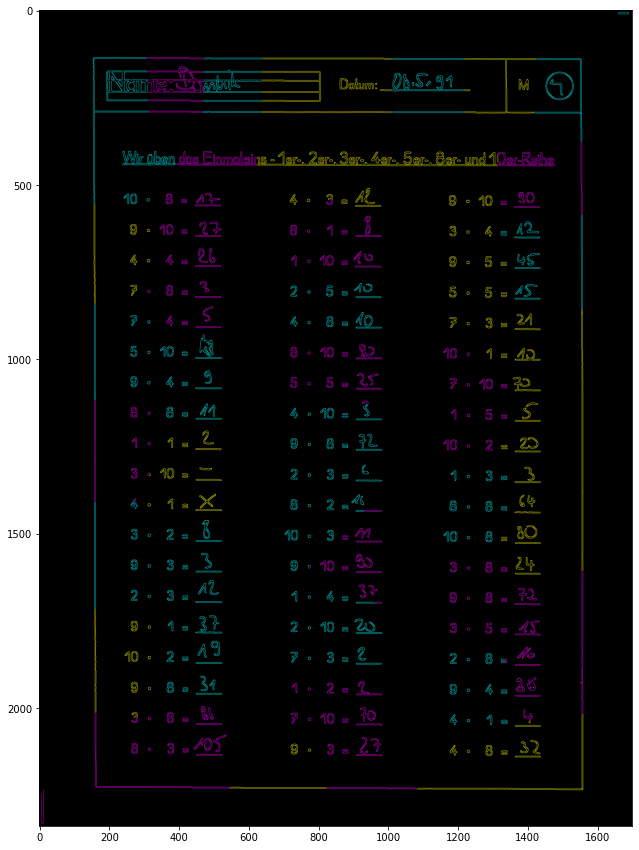

In [10]:
# Plot results   
# Color the Image
#colorMapList = [[255,0,0], [0,255,0], [0,0,255], [255,255,0], [0,255,255]]
clusterImg = np.zeros((length,width,3))
clusterImg[:,:] = (0, 0, 0)
for idx, (x, y) in enumerate(pointList): 
    clusterImg[x,y] = colorMapList[k_means.labels_[idx]]

plt.figure(figsize=(15,15))
plt.imshow(clusterImg)


In [11]:
# Alternatively, apply threshold on actual greyscale values in order to filter out empty spaces 
# (rather than relying on edge detection, i.e. the Canny filter)